In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Logistic regression


Logistic Regression - Accuracy: 0.6189881324172393

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      3489
           1       0.60      0.48      0.54      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.61      0.61      6404
weighted avg       0.62      0.62      0.61      6404



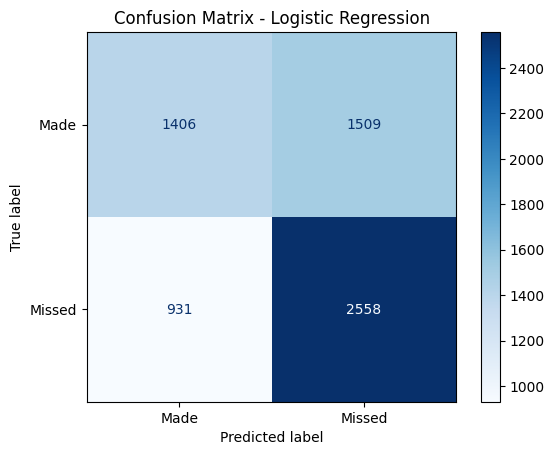

In [4]:
file_path = r"./data/shot_logs.csv"
df = pd.read_csv(file_path)

df['SHOT_CLOCK'] = df['SHOT_CLOCK'].fillna(df['SHOT_CLOCK'].median())

def convert_time_to_seconds(clock):
    if isinstance(clock, str):
        minutes, seconds = map(int, clock.split(":"))
        return minutes * 60 + seconds
    return None

df['GAME_CLOCK'] = df['GAME_CLOCK'].apply(convert_time_to_seconds)

df['LOCATION_NUM'] = df['LOCATION'].map({'H': 1, 'A': 0})
df['W_NUM'] = df['W'].map({'W': 1, 'L': 0})

encoder = LabelEncoder()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

model = LogisticRegression(penalty='l2', C=0.1, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nLogistic Regression - Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# SVN

Data standardization done
Data split done
Model fit done

SVM - Accuracy: 0.594383775351014

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.79      0.68       349
           1       0.59      0.37      0.45       292

    accuracy                           0.59       641
   macro avg       0.59      0.58      0.56       641
weighted avg       0.59      0.59      0.57       641



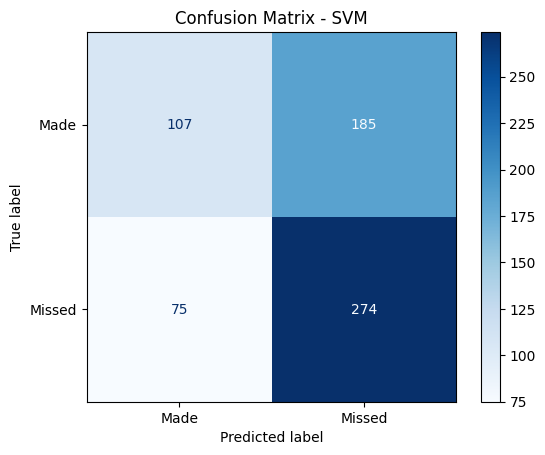

In [5]:
encoder = LabelEncoder()
df = df.sample(frac=.1, random_state=42)
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data standardization done")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)
print("Data split done")

# SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)
print("Model fit done")

y_pred = svm_model.predict(X_test)

print("\nSVM - Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()

# Nerual network

2025-01-18 20:25:36.331746: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-18 20:25:36.336166: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-18 20:25:36.348077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737228336.368226  341017 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737228336.374205  341017 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-18 20:25:36.395628: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/50


/home/marko/Dokumenti/Fax/UUZOP/lab3/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-18 20:25:38.583694: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5531 - loss: 0.8165 - val_accuracy: 0.6237 - val_loss: 0.6975
Epoch 2/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6048 - loss: 0.6974 - val_accuracy: 0.6212 - val_loss: 0.6849
Epoch 3/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6023 - loss: 0.6880 - val_accuracy: 0.6146 - val_loss: 0.6825
Epoch 4/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5959 - loss: 0.6856 - val_accuracy: 0.6179 - val_loss: 0.6831
Epoch 5/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6013 - loss: 0.6874 - val_accuracy: 0.6228 - val_loss: 0.6834
Epoch 6/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5987 - loss: 0.6879 - val_accuracy: 0.6187 - val_loss: 0.6818
Epoch 7/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5892 - loss: 0.6890 - val_accuracy: 0.6212 - val_loss: 0.6820
Epoch 8/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5892 - loss: 0.6889 - val_accuracy: 0.6097 - val_

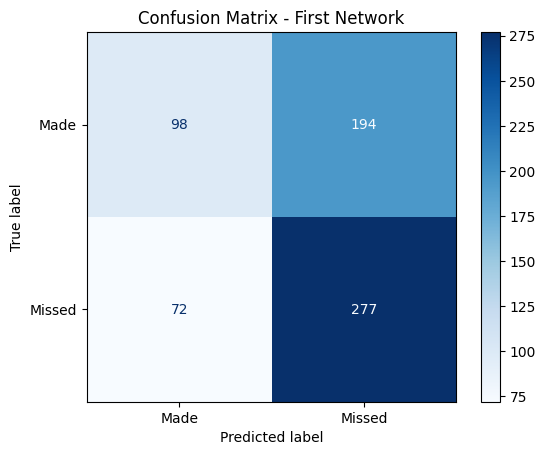

In [7]:
from keras import models, layers, regularizers

# Load and preprocess data
encoder = LabelEncoder()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

# First Network: Sigmoid activation for both hidden and output layers
model1 = models.Sequential([
    layers.Dense(50, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")

print("\nFirst Network - Accuracy:", accuracy_score(y_test, y_pred1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

cm1 = confusion_matrix(y_test, y_pred1, labels=[1, 0])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["Made", "Missed"])
disp1.plot(cmap="Blues")
plt.title("Confusion Matrix - First Network")
plt.show()


# Druga mreža

In [ ]:
# Second Network: ReLU activation for hidden layer, Sigmoid for output layer
model2 = models.Sequential([
    layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")

print("\nSecond Network - Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

cm2 = confusion_matrix(y_test, y_pred2, labels=[1, 0])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Made", "Missed"])
disp2.plot(cmap="Blues")
plt.title("Confusion Matrix - Second Network")
plt.show()